In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
file_path = "data/unclean_global_superstore.xlsx"
unclean_df = pd.read_excel(file_path)

In [4]:
print("Basic Info Before Cleaning:")
print(unclean_df.info())
print("\nSample Data Before Cleaning:")
unclean_df.head()

Basic Info Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53854 entries, 0 to 53853
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          53854 non-null  int64         
 1   Order ID        53854 non-null  object        
 2   Order Date      53854 non-null  datetime64[ns]
 3   Ship Date       53854 non-null  datetime64[ns]
 4   Ship Mode       53854 non-null  object        
 5   Customer ID     53854 non-null  object        
 6   Customer Name   48456 non-null  object        
 7   Segment         53854 non-null  object        
 8   Postal Code     10474 non-null  float64       
 9   City            53854 non-null  object        
 10  State           53854 non-null  object        
 11  Country         53854 non-null  object        
 12  Region          53854 non-null  object        
 13  Market          53854 non-null  object        
 14  Product ID      53854 non-

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,NaN,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [6]:
clean_df = unclean_df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'))
clean_df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,NaN,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [10]:
clean_df = clean_df.drop_duplicates()
print(unclean_df.info())
print(clean_df.info())
clean_df.sample(6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53854 entries, 0 to 53853
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          53854 non-null  int64         
 1   Order ID        53854 non-null  object        
 2   Order Date      53854 non-null  datetime64[ns]
 3   Ship Date       53854 non-null  datetime64[ns]
 4   Ship Mode       53854 non-null  object        
 5   Customer ID     53854 non-null  object        
 6   Customer Name   48456 non-null  object        
 7   Segment         53854 non-null  object        
 8   Postal Code     10474 non-null  float64       
 9   City            53854 non-null  object        
 10  State           53854 non-null  object        
 11  Country         53854 non-null  object        
 12  Region          53854 non-null  object        
 13  Market          53854 non-null  object        
 14  Product ID      53854 non-null  object        
 15  Ca

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
46670,42465,SU-2015-TC11475122-42165,2015-06-10,2015-06-16,Standard Class,TC-11475122,Tony Chapman,Home Office,NaN,Al Manaqil,...,OFF-BI-3734,Office Supplies,Binders,"Cardinal Hole Reinforcements, Durable",6.84,1,0.0,1.4100,1.52,Medium
32787,25208,ID-2012-SA20830118-41249,2012-12-06,2012-12-10,Standard Class,SA-20830118,Sue Ann Reed,Consumer,NaN,Seoul,...,OFF-EN-5037,Office Supplies,Envelopes,"Kraft Manila Envelope, Recycled",25.29,2,0.5,-9.6300,4.36,High
5958,7744,MX-2013-LR1691531-41583,2013-11-05,2013-11-08,First Class,LR-1691531,Lena Radford,Consumer,NaN,Artemisa,...,FUR-FU-4065,Furniture,Furnishings,"Eldon Frame, Duo Pack",155.08,2,0.0,9.2800,56.72,Critical
40227,33977,CA-2015-MH18115140-42026,2015-01-22,2015-01-28,Standard Class,MH-181151402,Mick Hernandez,Home Office,49201.0,Jackson,...,TEC-AC-5105,Technology,Accessories,Logitech G19 Programmable Gaming Keyboard,619.95,5,0.0,111.5910,27.79,Medium
12621,19340,ES-2012-JD16015120-41077,2012-06-17,2012-06-24,Standard Class,JD-16015120,Joy Daniels,Consumer,NaN,Valladolid,...,TEC-MA-5495,Technology,Machines,"Okidata Calculator, White",410.67,9,0.1,-36.7200,24.92,Low
48372,39979,CA-2012-SR20740140-41217,2012-11-04,2012-11-09,Standard Class,SR-207401408,Steven Roelle,Home Office,22204.0,Arlington,...,TEC-AC-5180,Technology,Accessories,Maxell 4.7GB DVD-RW 3/Pack,47.79,3,0.0,16.2486,7.06,High


In [15]:
clean_df['customer_name'] = clean_df['customer_name'].fillna('Unknown')
print(unclean_df['Customer Name'] == np.nan)
print(clean_df['customer_name'].isna().sum())
clean_df.sample(5)

0        False
1        False
2        False
3        False
4        False
         ...  
53849    False
53850    False
53851    False
53852    False
53853    False
Name: Customer Name, Length: 53854, dtype: bool
0


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
36377,12288,ES-2014-CS1195034-41867,2014-08-16,2014-08-20,Second Class,CS-1195034,Carlos Soltero,Consumer,NaN,Frederiksberg,...,OFF-AR-3534,Office Supplies,Art,"Boston Highlighters, Water Color",44.100,4,0.5,-28.2600,3.180,Medium
18401,4458,MX-2014-ED1388582-41819,2014-06-29,2014-06-30,First Class,ED-1388582,Emily Ducich,Home Office,NaN,Piedras Negras,...,TEC-PH-3133,Technology,Phones,"Apple Headset, Full Size",149.100,3,0.0,67.0800,14.384,High
8297,3382,MX-2014-MM1828031-41853,2014-08-02,2014-08-07,Second Class,MM-1828031,Muhammed MacIntyre,Corporate,NaN,Las Tunas,...,OFF-PA-4461,Office Supplies,Paper,"Green Bar Cards & Envelopes, 8.5 x 11",315.180,9,0.0,110.1600,40.759,Medium
37603,41168,CA-2015-MH17455140-42284,2015-10-07,2015-10-07,Same Day,MH-174551402,Mark Hamilton,Consumer,60623.0,Chicago,...,OFF-ST-3015,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,290.336,2,0.2,32.6628,27.280,High
14805,17734,ES-2014-SL2015548-41898,2014-09-16,2014-09-20,Standard Class,SL-2015548,Sara Luxemburg,Home Office,NaN,Bochum,...,TEC-PH-3796,Technology,Phones,unknown_product,249.930,3,0.0,52.4700,20.070,Medium


In [16]:
clean_df['sales'] = pd.to_numeric(clean_df['sales'], errors='coerce').fillna(0)
clean_df['profit'] = pd.to_numeric(clean_df['profit'], errors='coerce').fillna(0)
print(clean_df.info())
clean_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 51381 entries, 0 to 53846
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_id          51381 non-null  int64         
 1   order_id        51381 non-null  object        
 2   order_date      51381 non-null  datetime64[ns]
 3   ship_date       51381 non-null  datetime64[ns]
 4   ship_mode       51381 non-null  object        
 5   customer_id     51381 non-null  object        
 6   customer_name   51381 non-null  object        
 7   segment         51381 non-null  object        
 8   postal_code     10010 non-null  float64       
 9   city            51381 non-null  object        
 10  state           51381 non-null  object        
 11  country         51381 non-null  object        
 12  region          51381 non-null  object        
 13  market          51381 non-null  object        
 14  product_id      51381 non-null  object        
 15  categor

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
19632,1193,MX-2012-TT2146031-41087,2012-06-27,2012-07-04,Standard Class,TT-2146031,Tonja Turnell,Home Office,NaN,Santa Clara,...,FUR-CH-5407,Furniture,Chairs,"Novimex Steel Folding Chair, Black",319.2000,6,0.00,143.6400,12.896,Medium
13939,3704,MX-2012-MF1825082-41273,2012-12-30,2013-01-03,Standard Class,MF-1825082,Monica Federle,Corporate,NaN,Coatzacoalcos,...,OFF-ST-5691,Office Supplies,Storage,"Rogers File Cart, Blue",281.3400,3,0.00,11.2200,21.854,Medium
49551,41799,TU-2015-DK3150134-42157,2015-06-02,2015-06-08,Standard Class,DK-3150134,David Kendrick,Corporate,NaN,Konya,...,FUR-CH-5793,Furniture,Chairs,"SAFCO Rocking Chair, Adjustable",54.9600,1,0.60,-330.0000,1.240,Medium
1656,6357,MX-2015-CL1270018-42348,2015-12-10,2015-12-12,Second Class,CL-1270018,Craig Leslie,Home Office,NaN,São Paulo,...,FUR-BO-4857,Furniture,Bookcases,"Ikea Floating Shelf Set, Mobile",576.2000,5,0.00,242.0000,150.876,Critical
7356,20564,ID-2012-GD14590130-40941,2012-02-02,2012-02-04,Second Class,GD-14590130,Unknown,Corporate,NaN,Bangkok,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",334.3035,1,0.27,-109.9365,46.300,Medium


In [17]:
clean_df['postal_code'] = pd.to_numeric(clean_df['postal_code'], errors='coerce')
print(clean_df.info())
clean_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 51381 entries, 0 to 53846
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_id          51381 non-null  int64         
 1   order_id        51381 non-null  object        
 2   order_date      51381 non-null  datetime64[ns]
 3   ship_date       51381 non-null  datetime64[ns]
 4   ship_mode       51381 non-null  object        
 5   customer_id     51381 non-null  object        
 6   customer_name   51381 non-null  object        
 7   segment         51381 non-null  object        
 8   postal_code     10010 non-null  float64       
 9   city            51381 non-null  object        
 10  state           51381 non-null  object        
 11  country         51381 non-null  object        
 12  region          51381 non-null  object        
 13  market          51381 non-null  object        
 14  product_id      51381 non-null  object        
 15  categor

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
41266,36928,CA-2012-NF18385140-40951,2012-02-12,2012-02-16,Standard Class,NF-183851408,Natalie Fritzler,Consumer,23320.0,Chesapeake,...,FUR-TA-4614,Furniture,Tables,Hon 2111 Invitation Series Corner Table,1256.2200,6,0.00,75.3732,212.940,High
33003,30871,ID-2015-HA1490592-42287,2015-10-10,2015-10-14,Standard Class,HA-1490592,Helen Abelman,Consumer,NaN,Gisborne,...,OFF-BI-4830,Office Supplies,Binders,"Ibico Index Tab, Economy",24.9840,6,0.60,-88.5600,4.270,High
35819,3626,US-2013-MD1786082-41592,2013-11-14,2013-11-19,Standard Class,MD-1786082,Michael Dominguez,Corporate,NaN,Atlixco,...,OFF-FA-6207,Office Supplies,Fasteners,"Stockwell Thumb Tacks, Bulk Pack",45.1000,5,0.00,16.6000,3.341,Medium
6068,15949,IT-2012-ZC2191048-41174,2012-09-22,2012-09-24,First Class,ZC-2191048,Zuschuss Carroll,Consumer,NaN,Berlin,...,OFF-AR-3447,Office Supplies,Art,"BIC Canvas, Blue",144.9900,3,0.10,-3.2400,55.700,Critical
2154,23937,ID-2014-JH1543059-41996,2014-12-23,2014-12-28,Standard Class,JH-1543059,Jennifer Halladay,Consumer,NaN,Depok,...,FUR-TA-5074,Furniture,Tables,"Lesro Wood Table, with Bottom Storage",990.9516,4,0.47,-878.7684,127.590,High


In [21]:
def cap_outliers(series, threshold=3):
    z_scores = np.abs(stats.zscore(series))
    return np.where(z_scores > threshold, series.median(), series)

clean_df['sales'] = cap_outliers(clean_df['sales'])
clean_df['profit'] = cap_outliers(clean_df['profit'])

clean_df[['sales','profit']]

,sales,profit
0,221.980,62.1544
1,76.356,9.8760
2,76.356,9.8760
3,76.356,-96.5400
4,76.356,9.8760
...,...,...
53710,94.032,-169.2780
53755,289.920,81.1200
53767,68.526,27.3060
53826,286.299,-83.6910


In [25]:
clean_df = clean_df[clean_df['product_name'] != 'unknown_product']
clean_df = clean_df[clean_df['order_date'] != 'unknown_date']
print(clean_df['product_name'][clean_df['product_name'] == 'unknown_product'].sum())
print(clean_df['order_date'][clean_df['order_date'] == 'unknown_date'])
clean_df.sample(5)

0
Series([], Name: order_date, dtype: datetime64[ns])


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
45845,32412,CA-2015-RA19915140-42357,2015-12-19,2015-12-24,Second Class,RA-199151404,Russell Applegate,Consumer,92024.0,Encinitas,...,TEC-AC-5147,Technology,Accessories,Logitech Illuminated - Keyboard,0.000,2,0.0,57.5904,15.470,Medium
24553,34813,US-2014-HA14920140-41861,2014-08-10,2014-08-13,First Class,HA-149201408,Helen Andreada,Consumer,28314.0,Fayetteville,...,OFF-PA-6548,Office Supplies,Paper,Xerox 199,30.816,9,0.2,96.3000,5.510,High
42328,7593,MX-2013-BE1141031-41556,2013-10-09,2013-10-14,Standard Class,BE-1141031,Bobby Elias,Consumer,NaN,Santiago de Cuba,...,OFF-BI-6400,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Recycled",22.820,7,0.0,6.1600,1.924,Medium
42415,4119,US-2013-PM18940143-41609,2013-12-01,2013-12-06,Standard Class,PM-18940143,Paul MacIntyre,Consumer,NaN,Valle de La Pascua,...,OFF-ST-6231,Office Supplies,Storage,"Tenex Box, Wire Frame",18.684,3,0.4,-8.1360,1.917,Medium
49257,31355,CA-2014-TB21055140-41808,2014-06-18,2014-06-19,First Class,TB-210551406,Ted Butterfield,Consumer,12180.0,Troy,...,OFF-PA-3156,Office Supplies,Paper,"Array Parchment Paper, Assorted Colors",14.560,2,0.0,6.9888,2.690,Critical


In [26]:
clean_df['order_date'] = pd.to_datetime(clean_df['order_date'], errors='coerce')
clean_df = clean_df.sort_values(by=['order_date', 'sales'], ascending=[True, False])
print(clean_df.info())
clean_df

<class 'pandas.core.frame.DataFrame'>
Index: 50306 entries, 31870 to 39602
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_id          50306 non-null  int64         
 1   order_id        50306 non-null  object        
 2   order_date      50306 non-null  datetime64[ns]
 3   ship_date       50306 non-null  datetime64[ns]
 4   ship_mode       50306 non-null  object        
 5   customer_id     50306 non-null  object        
 6   customer_name   50306 non-null  object        
 7   segment         50306 non-null  object        
 8   postal_code     9794 non-null   float64       
 9   city            50306 non-null  object        
 10  state           50306 non-null  object        
 11  country         50306 non-null  object        
 12  region          50306 non-null  object        
 13  market          50306 non-null  object        
 14  product_id      50306 non-null  object        
 15  cat

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
31870,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,...,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.700,Medium
43610,22254,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,...,OFF-PA-3990,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.800,Medium
31583,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,NaN,Stockholm,...,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.820,High
9352,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Unknown,Consumer,NaN,Constantine,...,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",0.000,2,0.0,106.140,35.460,Medium
22950,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,...,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",0.000,3,0.1,36.036,9.720,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28257,1785,MX-2015-EB1397518-42369,2015-12-31,2016-01-03,Second Class,EB-1397518,Erica Bern,Corporate,NaN,São Paulo,...,OFF-BI-3187,Office Supplies,Binders,"Avery 3-Hole Punch, Durable",0.000,3,0.0,16.440,6.336,High
28690,50446,TZ-2015-JA5970129-42369,2015-12-31,2016-01-03,First Class,JA-5970129,Joseph Airdo,Consumer,NaN,Dar es Salaam,...,OFF-ST-4264,Office Supplies,Storage,"Fellowes Folders, Wire Frame",0.000,1,0.1,4.053,6.110,High
28910,8855,MX-2015-CM1219093-42369,2015-12-31,2016-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,NaN,Managua,...,TEC-PH-5346,Technology,Phones,"Nokia Office Telephone, Cordless",0.000,3,0.0,10.860,6.003,Medium
34086,23682,IN-2015-BS1136558-42369,2015-12-31,2016-01-05,Second Class,BS-1136558,Bill Shonely,Corporate,NaN,Vijayawada,...,OFF-ST-5688,Office Supplies,Storage,"Rogers Box, Single Width",0.000,3,0.0,4.320,3.880,Medium


In [30]:
clean_df['profit_margin'] = np.where(clean_df['sales'] > 0, clean_df['profit'] / clean_df['sales'], 0)
print(clean_df['profit_margin'])
print(clean_df.info())

31870    0.332278
43610    0.277723
31583   -0.580742
9352     0.000000
22950    0.000000
           ...   
28257    0.000000
28690    0.000000
28910    0.000000
34086    0.000000
39602    0.000000
Name: profit_margin, Length: 50306, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 50306 entries, 31870 to 39602
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_id          50306 non-null  int64         
 1   order_id        50306 non-null  object        
 2   order_date      50306 non-null  datetime64[ns]
 3   ship_date       50306 non-null  datetime64[ns]
 4   ship_mode       50306 non-null  object        
 5   customer_id     50306 non-null  object        
 6   customer_name   50306 non-null  object        
 7   segment         50306 non-null  object        
 8   postal_code     9794 non-null   float64       
 9   city            50306 non-null  object        
 10  state         

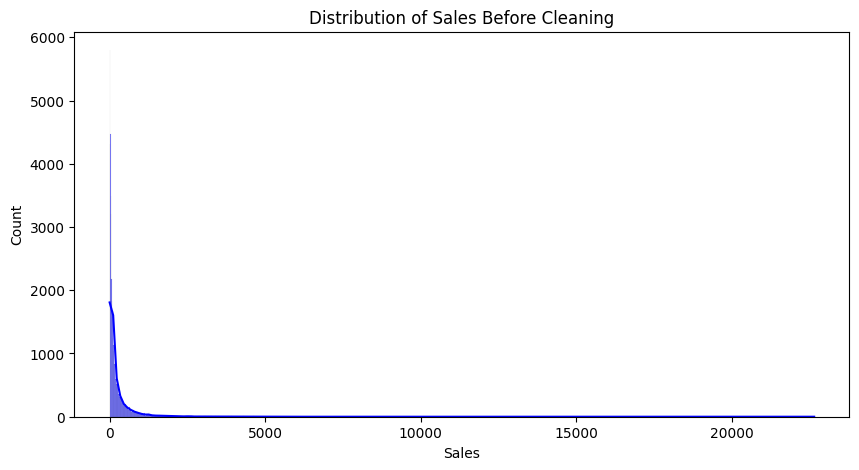

In [31]:
# Distribution of sales before cleaning
plt.figure(figsize=(10, 5))
sns.histplot(unclean_df['Sales'], kde=True, color='blue')
plt.title('Distribution of Sales Before Cleaning')
plt.show()

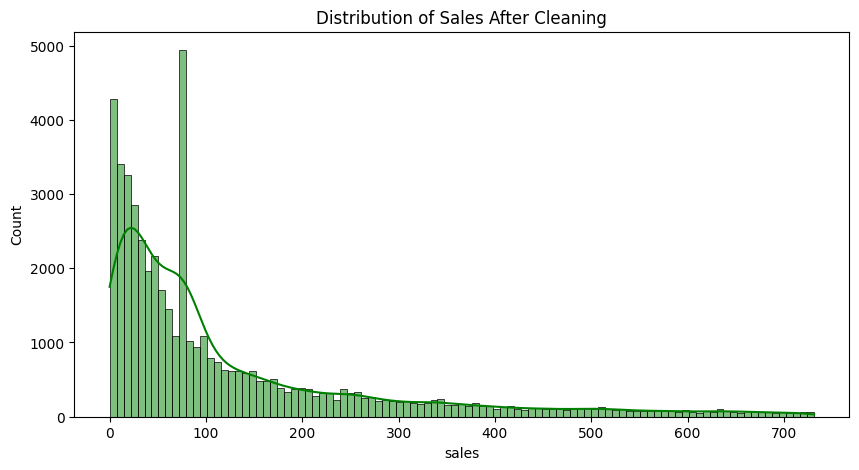

In [32]:
# Distribution of sales after cleaning
plt.figure(figsize=(10, 5))
sns.histplot(clean_df['sales'], kde=True, color='green')
plt.title('Distribution of Sales After Cleaning')
plt.show()

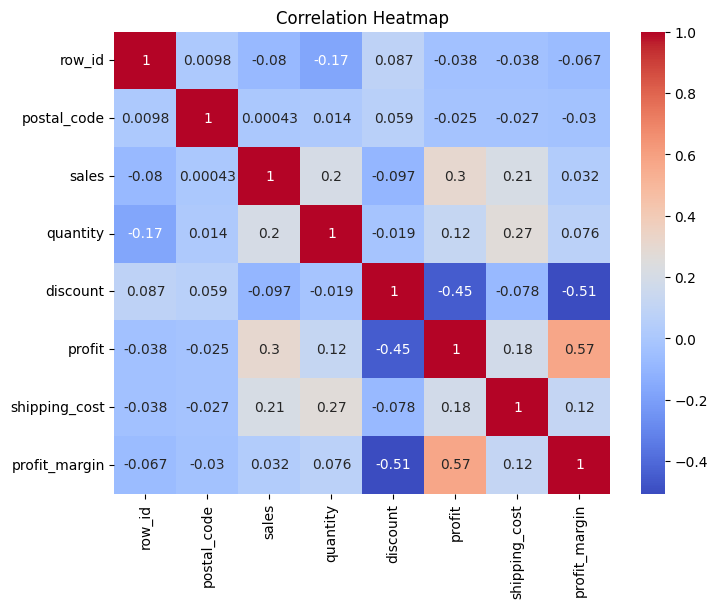

In [34]:
#Visualizing correlations between columns
plt.figure(figsize=(8, 6))
sns.heatmap(clean_df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [37]:
print("\nSummary Statistics After Cleaning:")
clean_df.describe()



Summary Statistics After Cleaning:


,row_id,order_date,ship_date,postal_code,sales,quantity,discount,profit,shipping_cost,profit_margin
count,50306.000000,50306,50306,9794.000000,50306.000000,50306.000000,50306.000000,50306.000000,50306.000000,50306.000000
mean,25640.245060,2014-05-12 00:29:51.340993280,2014-05-15 23:45:10.340715008,55147.753012,126.465025,3.476265,0.142862,19.876059,26.460967,0.117023
min,1.000000,2012-01-01 00:00:00,2012-01-03 00:00:00,1040.000000,0.000000,1.000000,0.000000,-226.464000,1.002000,-23.333333
25%,12805.250000,2013-06-19 00:00:00,2013-06-23 00:00:00,23223.000000,25.860000,2.000000,0.000000,0.742500,2.610000,0.000000
50%,25648.500000,2014-07-08 00:00:00,2014-07-12 00:00:00,55901.000000,76.320000,3.000000,0.000000,9.876000,7.790000,0.136407
75%,38471.750000,2015-05-22 00:00:00,2015-05-26 00:00:00,90008.000000,160.627500,5.000000,0.200000,30.780000,24.467500,0.337500
max,51290.000000,2015-12-31 00:00:00,2016-01-07 00:00:00,99301.000000,731.424000,14.000000,0.850000,274.995000,933.570000,5.000000
std,14811.999322,NaN,NaN,32065.629138,152.367050,2.280604,0.212184,59.505492,57.120958,0.818972


In [38]:
# Save the cleaned data to a new Excel file
clean_file_path = 'amazon_global_superstore.xlsx'
clean_df.to_excel(clean_file_path, index=False)
